<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_2_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1 - load using your preferred pattern (DO THIS FIRST)
from google.colab import files
uploaded = files.upload()     # choose WineQT.csv (or the CSV you downloaded)

import pandas as pd
df = pd.read_csv('WineQT.csv')   # change filename only if yours is different
print("Loaded shape:", df.shape)
display(df.head())


Saving WineQT.csv to WineQT.csv
Loaded shape: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Cell 2 - inspect basic info
print("Columns:", df.columns.tolist())
print("\nData types:")
display(df.dtypes)
print("\nMissing values (top 10):")
display(df.isnull().sum().sort_values(ascending=False).head(10))
print("\nBasic stats for numeric columns:")
display(df.describe().transpose())


Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

Data types:


,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64



Missing values (top 10):


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0



Basic stats for numeric columns:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [ ]:
# Cell 3 - cleaning & numeric safety
import numpy as np

# Strip column names and standardize
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Convert all columns that look numeric to numeric (coerce)
for c in df.columns:
    if df[c].dtype == object:
        # remove commas, dollar signs etc then coerce
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[^0-9.\-]', '', regex=True), errors='coerce')

# Drop duplicates
dup = df.duplicated().sum()
print("Duplicate rows:", dup)
if dup:
    df = df.drop_duplicates()
    print("Dropped duplicates. New shape:", df.shape)

# Fill or report missing values
miss = df.isnull().sum()
print("Missing per column:\n", miss[miss>0])

# If any numeric missing, fill with median (small dataset)
for c in df.select_dtypes(include=[np.number]).columns:
    if df[c].isnull().sum() > 0:
        med = df[c].median()
        df[c].fillna(med, inplace=True)
        print(f"Filled missing for {c} with median {med}")

print("After cleaning shape:", df.shape)
display(df.head())


Duplicate rows: 0
Missing per column:
 Series([], dtype: int64)
After cleaning shape: (1143, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


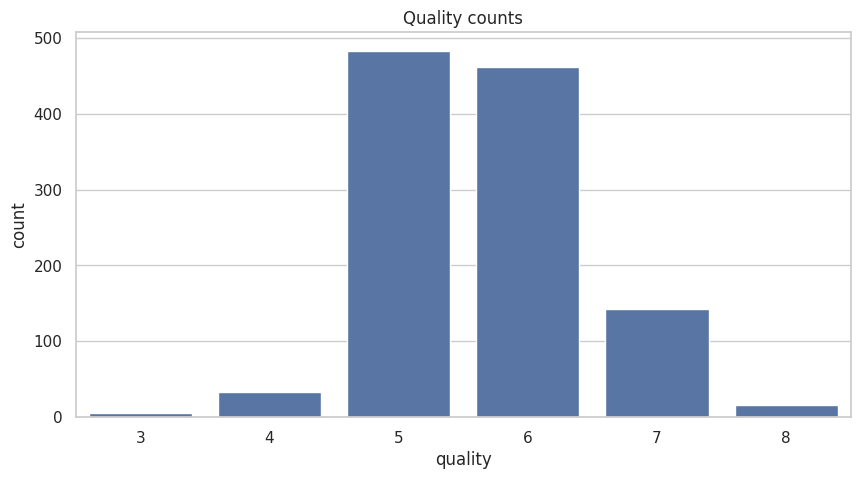

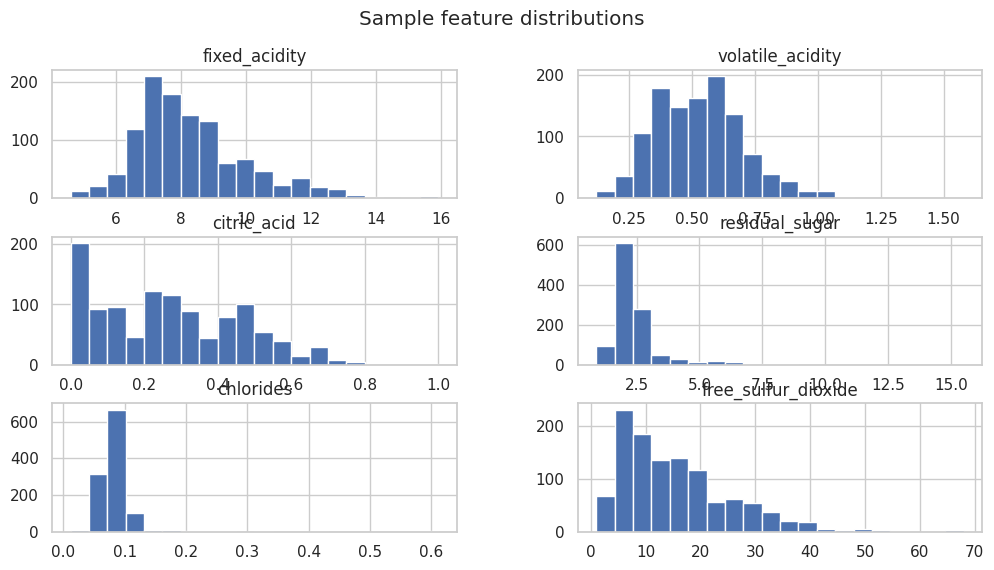

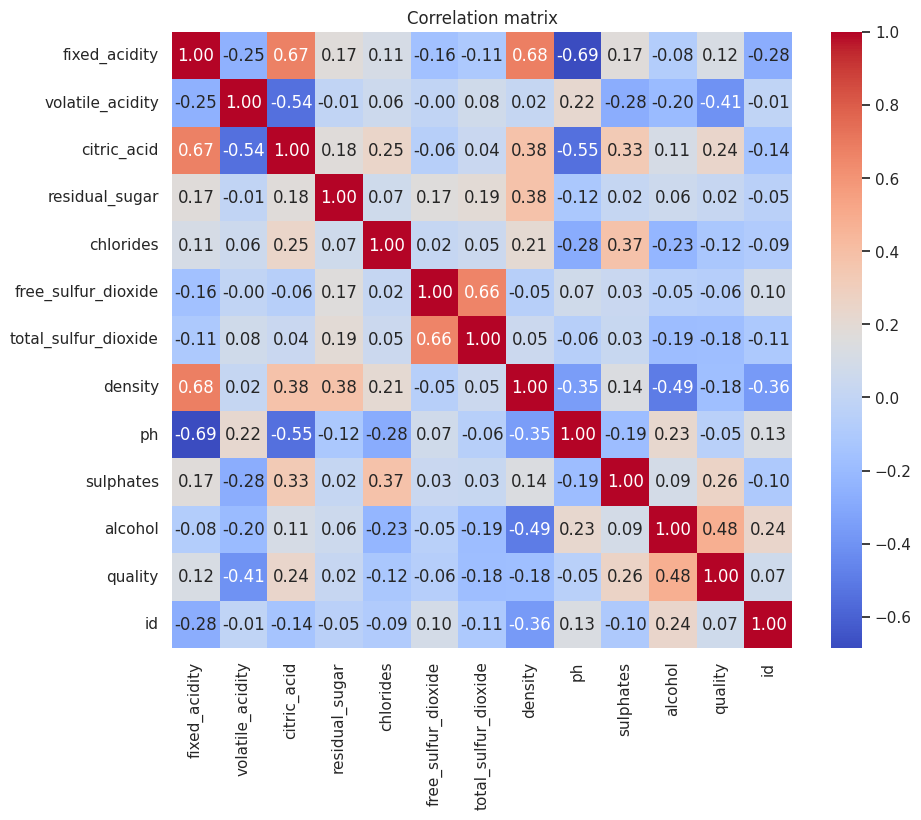

In [ ]:
# Cell 4 - EDA: histograms and correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# Target presence check
if 'quality' not in df.columns:
    raise KeyError("No 'quality' column found. Inspect df.columns and ensure the target exists.")

# Histogram for quality
plt.figure()
sns.countplot(x='quality', data=df)
plt.title('Quality counts')
plt.show()

# Histograms for a few features
num_cols = df.select_dtypes(include=['number']).columns.tolist()
sample_cols = [c for c in num_cols if c!='quality'][:6]
df[sample_cols].hist(bins=20, figsize=(12,6))
plt.suptitle('Sample feature distributions')
plt.show()

# Correlation heatmap (numeric only)
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


In [ ]:
# Cell 5 - Regression pipeline: predict quality (numeric)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
FEATURES = [c for c in df.columns if c != 'quality']
X = df[FEATURES].values
y = df['quality'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear regression baseline
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression — RMSE:", round(rmse,4), " R2:", round(r2,4))


Linear Regression — RMSE: 0.6184  R2: 0.3128


In [ ]:
# Cell 6 - Random Forest (generally stronger on tabular data)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)   # using unscaled features is fine for tree models
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest — RMSE:", round(rmse_rf,4), " R2:", round(r2_rf,4))


Random Forest — RMSE: 0.5486  R2: 0.4591


,feature,importance
0,alcohol,0.271176
1,volatile_acidity,0.150082
2,sulphates,0.136672
3,total_sulfur_dioxide,0.065921
4,id,0.064384
5,ph,0.050607
6,chlorides,0.048214
7,density,0.045584
8,citric_acid,0.043021
9,residual_sugar,0.042714


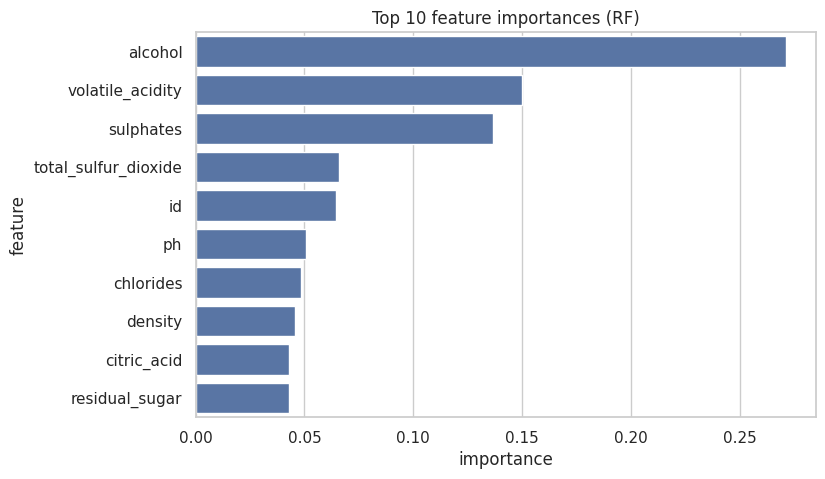

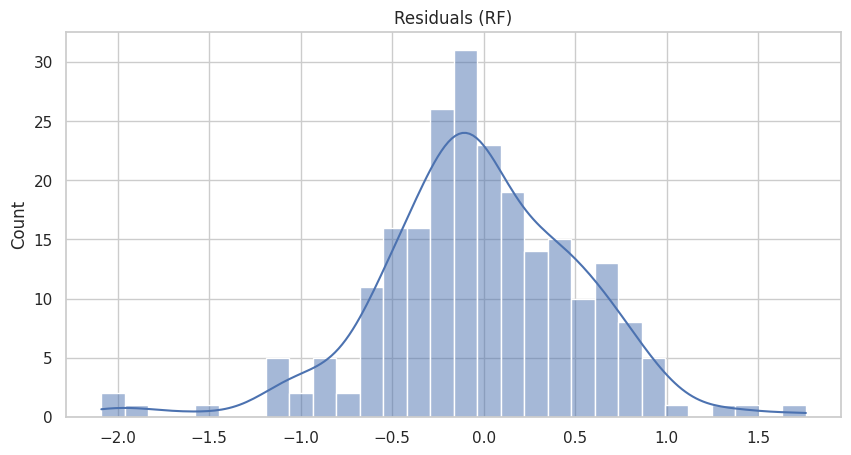

In [ ]:
# Cell 7 - Feature importance and residual diagnostics
import pandas as pd

imp = pd.DataFrame({'feature': FEATURES, 'importance': rf.feature_importances_})
imp = imp.sort_values('importance', ascending=False).reset_index(drop=True)
display(imp)

# Plot top 10 importances
plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=imp.head(10))
plt.title('Top 10 feature importances (RF)')
plt.show()

# Residuals plot for RF
resids = y_test - y_pred_rf
plt.figure()
sns.histplot(resids, bins=30, kde=True)
plt.title('Residuals (RF)')
plt.show()


In [ ]:
# Cell 8 - classification: binarize quality (>=7 good, <7 bad) and train classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Binarize: choose threshold (7 commonly used)
df['quality_label'] = (df['quality'] >= 7).astype(int)   # 1 = good, 0 = not-good

Xc = df[FEATURES].values
yc = df['quality_label'].values
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42, stratify=yc)

clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)

print("Classification accuracy:", round(accuracy_score(yc_test, yc_pred),4))
print(classification_report(yc_test, yc_pred))
print("Confusion matrix:\n", confusion_matrix(yc_test, yc_pred))


Classification accuracy: 0.9214
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       197
           1       0.77      0.62      0.69        32

    accuracy                           0.92       229
   macro avg       0.86      0.80      0.82       229
weighted avg       0.92      0.92      0.92       229

Confusion matrix:
 [[191   6]
 [ 12  20]]


In [ ]:
# Cell 9 - simple GridSearch for Random Forest hyperparameters (takes longer)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 8, 16],
    'min_samples_split': [2, 5]
}
rf_grid = RandomForestRegressor(random_state=42, n_jobs=-1)
gcv = GridSearchCV(rf_grid, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
gcv.fit(X_train, y_train)
print("Best params:", gcv.best_params_)
best_rf = gcv.best_estimator_

# Evaluate best on test
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print("Tuned RF RMSE:", round(rmse_best,4))


Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RF RMSE: 0.5459
